# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`
pd.set_option('display.float_format', lambda x: '%.2f' % x) # formating
from matplotlib.dates import date2num

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Read and clean data

We import three different datasets from DST regarding GVA, construction Cost and employment for construction 

In [2]:
# We import three datasets from DST
GVA = DstApi('NABP10')
COST = DstApi('BYG32')
EMPLOY = DstApi('NABB10')

# Tables of the variables for three datasets
summary_GVA = GVA.tablesummary(language='en')
summary_COST = COST.tablesummary(language='en')
summary_EMPLOY = EMPLOY.tablesummary(language='en')
display(summary_GVA)
display(summary_COST)
display(summary_EMPLOY)

Table NABP10: 1-2.1.1 Production
and  generation of income (10a3-grouping) by transaction, industry, price unit and time
Last update: 2023-03-31T08:00:00
Table BYG32: Construction cost index for residential buildings by main index, kind, unit and time
Last update: 2023-03-08T08:00:00
Table NABB10: Employment (10a3-grouping) by socioeconomic status, industry and time
Last update: 2023-03-31T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TRANSAKT,10,P1K,P.1 Output,B1N2D,B.1n Net value added,False
1,BRANCHE,15,V,Total,VR_S,"R_S Arts, entertainment and other services",False
2,PRISENHED,2,V,Current prices,LAN,"2010-prices, chained values",False
3,Tid,57,1966,1966,2022,2022,True


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,HINDEKS,2,02,Construction Cost index for one-family houses,03,Construction Cost Index for multi-family houses,False
1,ART,3,1002,Total,1006,Total labour costs,False
2,ENHED,2,100,Index,315,Percentage change compared to previous year,False
3,Tid,83,1940,1940,2022,2022,True


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,SOCIO,4,EMPH_DC,"Hours worked (1,000 hours)",SALM_DC,Employees (number),False
1,BRANCHE,15,V,Total,VR_S,"R_S Arts, entertainment and other services",False
2,Tid,57,1966,1966,2022,2022,True


Import your data, either through an API or manually, and load it. 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

In [3]:
# We show the available values for each variable in the three datasets: 
for variable in summary_GVA['variable name']:
    print(variable+':')
    display(GVA.variable_levels(variable, language='en'))

for variable in summary_COST['variable name']:
    print(variable+':')
    display(COST.variable_levels(variable, language='en'))

for variable in summary_EMPLOY['variable name']:
    print(variable+':')
    display(EMPLOY.variable_levels(variable, language='en'))

TRANSAKT:


,id,text
0,P1K,P.1 Output
1,P2D,P.2 Intermediate consumption
2,B1GD,B.1g Gross value added
3,D29X39D,D.29-D.39 Other taxes less subsidies on produc...
4,B1GFD,B.1GF Gross domestic product at factor cost
5,D1D,D.1 Compensation of employees
6,B2A3GD,B.2g+B.3g Gross operating surplus and mixed in...
7,P51CD,P.51c Consumption of fixed capital
8,B2A3ND,B.2n+B.3n Net operating surplus and mixed income
9,B1N2D,B.1n Net value added


BRANCHE:


,id,text
0,V,Total
1,VMEMO,Of which: General government
2,VA,"A Agriculture, forestry and fishing"
3,VB,B Mining and quarrying
4,VC,C Manufacturing
5,VD_E,D_E Utility services
6,VF,F Construction
7,VG_I,G_I Trade and transport etc.
8,VJ,J Information and communication
9,VK,K Financial and insurance


PRISENHED:


,id,text
0,V,Current prices
1,LAN,"2010-prices, chained values"


Tid:


,id,text
0,1966,1966
1,1967,1967
2,1968,1968
3,1969,1969
4,1970,1970
5,1971,1971
6,1972,1972
7,1973,1973
8,1974,1974
9,1975,1975


HINDEKS:


,id,text
0,02,Construction Cost index for one-family houses
1,03,Construction Cost Index for multi-family houses


ART:


,id,text
0,1002,Total
1,1004,Cost of materials
2,1006,Total labour costs


ENHED:


,id,text
0,100,Index
1,315,Percentage change compared to previous year


Tid:


,id,text
0,1940,1940
1,1941,1941
2,1942,1942
3,1943,1943
4,1944,1944
...,...,...
78,2018,2018
79,2019,2019
80,2020,2020
81,2021,2021


SOCIO:


,id,text
0,EMPH_DC,"Hours worked (1,000 hours)"
1,SALH_DC,"Hours worked for employees (1,000 hours)"
2,EMPM_DC,Employment (number)
3,SALM_DC,Employees (number)


BRANCHE:


,id,text
0,V,Total
1,VMEMO,Of which: General government
2,VA,"A Agriculture, forestry and fishing"
3,VB,B Mining and quarrying
4,VC,C Manufacturing
5,VD_E,D_E Utility services
6,VF,F Construction
7,VG_I,G_I Trade and transport etc.
8,VJ,J Information and communication
9,VK,K Financial and insurance


Tid:


,id,text
0,1966,1966
1,1967,1967
2,1968,1968
3,1969,1969
4,1970,1970
5,1971,1971
6,1972,1972
7,1973,1973
8,1974,1974
9,1975,1975


## Defining parameters, renamning variables and filtering & sorting datasets

In [4]:
# First we define the parameters
pars_GVA = GVA._define_base_params(language='en')
pars_COST = COST._define_base_params(language='en')
pars_EMPLOY = EMPLOY._define_base_params(language='en')

# filtering data in the three datasets
variables = pars_GVA['variables'] # Returns a view, that we can edit
variables[0]['values'] = ['B1GD']
variables[1]['values'] =['V','VF', 'VO_Q']
variables[2]['values'] = ['LAN']
variables[3]['values'] = ['>1988<=2022']

variables = pars_COST['variables'] # Returns a view, that we can edit
variables[0]['values'] = ['02']
variables[1]['values'] =['1002']
variables[2]['values'] = ['315']
variables[3]['values'] = ['>1989<=2022']

variables = pars_EMPLOY['variables'] # Returns a view, that we can edit
variables[0]['values'] = ['EMPM_DC']
variables[1]['values'] =['VF']
variables[2]['values'] = ['>1989<=2022']

# Load the api, new index, renamning and sorting
GVA_api = GVA.get_data(params=pars_GVA)
GVA_api.reset_index(inplace = True, drop = True)
GVA_api = GVA_api.apply(pd.to_numeric, errors='ignore')
GVA_api.rename(columns = {'INDHOLD': 'GVA'}, inplace=True)
GVA_api.sort_values(by=['BRANCHE', 'TID'], inplace=True)

COST_api = COST.get_data(params=pars_COST)
COST_api.reset_index(inplace = True, drop = True)
COST_api = COST_api.apply(pd.to_numeric, errors='ignore')
COST_api.rename(columns = {'INDHOLD': 'Pct. Change in cost'}, inplace=True)
COST_api.sort_values(by=['TID'], inplace=True)

EMPLOY_api = EMPLOY.get_data(params=pars_EMPLOY)
EMPLOY_api.reset_index(inplace = True, drop = True)
EMPLOY_api = EMPLOY_api.apply(pd.to_numeric, errors='ignore')
EMPLOY_api.rename(columns = {'INDHOLD': 'Employment'}, inplace=True)
EMPLOY_api.sort_values(by=['TID'], inplace=True)

# define datasets to graphs
total_plot = GVA_api[GVA_api.BRANCHE.str.contains('Total') == True]
constr_plot = GVA_api[GVA_api.BRANCHE.str.contains('F Construction') == True]
public_plot = GVA_api[GVA_api.BRANCHE.str.contains('O_Q Public administration, education and health') == True]

total_plot['Pct. Change'] = total_plot['GVA'].pct_change(periods=1)*100
constr_plot['Pct. Change'] = constr_plot['GVA'].pct_change(periods=1)*100
public_plot['Pct. Change'] = public_plot['GVA'].pct_change(periods=1)*100



/var/folders/qn/m3hbpy256cs_8mfcpffzgvzr0000gn/T/ipykernel_14370/3105687554.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_plot['Pct. Change'] = total_plot['GVA'].pct_change(periods=1)*100
/var/folders/qn/m3hbpy256cs_8mfcpffzgvzr0000gn/T/ipykernel_14370/3105687554.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constr_plot['Pct. Change'] = constr_plot['GVA'].pct_change(periods=1)*100
/var/folders/qn/m3hbpy256cs_8mfcpffzgvzr0000gn/T/ipykernel_14370/3105687554.py:50: SettingWithCopyWarning: 


# Merge datasets to graphs

In [5]:
# merge datasets to graph 2
merge_employ = pd.merge(constr_plot, EMPLOY_api, on='TID').drop('BRANCHE_y', axis=1)
merge_employ.head(5)

,TRANSAKT,BRANCHE_x,PRISENHED,TID,GVA,Pct. Change,SOCIO,Employment
0,B.1g Gross value added,F Construction,"2010-prices, chained values",1990,71122,-10.17,Employment (number),167536
1,B.1g Gross value added,F Construction,"2010-prices, chained values",1991,67631,-4.91,Employment (number),158232
2,B.1g Gross value added,F Construction,"2010-prices, chained values",1992,68059,0.63,Employment (number),153715
3,B.1g Gross value added,F Construction,"2010-prices, chained values",1993,59842,-12.07,Employment (number),148435
4,B.1g Gross value added,F Construction,"2010-prices, chained values",1994,63482,6.08,Employment (number),154387


In [6]:
# merge the data to graph 3
merge_cost = pd.merge(constr_plot, COST_api, on='TID')
merge_cost.head(5)

,TRANSAKT,BRANCHE,PRISENHED,TID,GVA,Pct. Change,HINDEKS,ART,ENHED,Pct. Change in cost
0,B.1g Gross value added,F Construction,"2010-prices, chained values",1990,71122,-10.17,Construction Cost index for one-family houses,Total,Percentage change compared to previous year,4.90
1,B.1g Gross value added,F Construction,"2010-prices, chained values",1991,67631,-4.91,Construction Cost index for one-family houses,Total,Percentage change compared to previous year,3.50
2,B.1g Gross value added,F Construction,"2010-prices, chained values",1992,68059,0.63,Construction Cost index for one-family houses,Total,Percentage change compared to previous year,2.80
3,B.1g Gross value added,F Construction,"2010-prices, chained values",1993,59842,-12.07,Construction Cost index for one-family houses,Total,Percentage change compared to previous year,1.80
4,B.1g Gross value added,F Construction,"2010-prices, chained values",1994,63482,6.08,Construction Cost index for one-family houses,Total,Percentage change compared to previous year,2.50


# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

In [13]:
# Descriptive statistic of GVA
GVA_api.groupby(by=['BRANCHE'])['GVA'].describe()

,count,mean,std,min,25%,50%,75%,max
BRANCHE,,,,,,,,
F Construction,34.00,78884.62,9930.01,59842.00,71181.75,78850.00,86260.00,101002.00
"O_Q Public administration, education and health",34.00,350392.53,35541.33,288214.00,323436.00,350355.00,379946.75,399037.00
Total,34.00,1505062.59,231774.34,1101580.00,1332590.25,1536286.00,1623845.75,1960651.00


In [16]:
# Descriptive statistic of pct. change in cost in the construction industry
merge_cost.groupby(by=['BRANCHE'])['Pct. Change in cost'].describe()

,count,mean,std,min,25%,50%,75%,max
BRANCHE,,,,,,,,
F Construction,33.00,2.81,1.91,-0.20,1.80,2.60,3.50,10.40


In [15]:
# Descriptive statistic of employmeny in the construdction industry
merge_employ.groupby(by=['BRANCHE_x'])['Employment'].describe()

,count,mean,std,min,25%,50%,75%,max
BRANCHE_x,,,,,,,,
F Construction,33.00,176389.91,16645.43,148435.00,165344.00,174542.00,186247.00,211078.00


Text(0.5, 1.0, 'Graph 1: GVA pct. change for two industries and the total in Denmark')

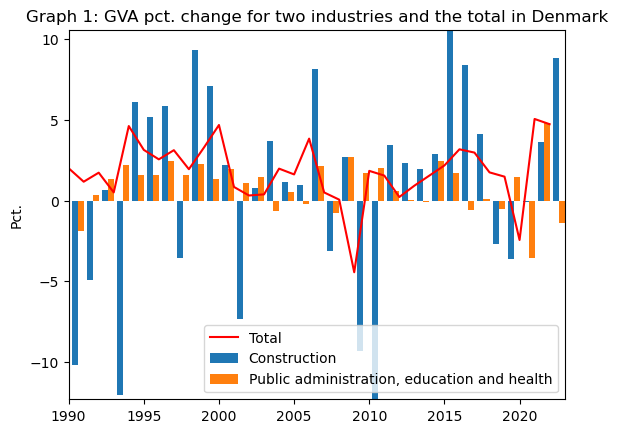

In [8]:
# Making a figure with both plot and bar
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(total_plot['TID'],total_plot['Pct. Change'],color='r',label='Total')
ax.bar(height=constr_plot['Pct. Change'],x=constr_plot['TID']+0.4, width=0.4, label='Construction')
ax.bar(height=public_plot['Pct. Change'],x=public_plot['TID']+0.8, width=0.4, label='Public administration, education and health')
ax.margins(0,0)
ax.legend()
plt.ylabel('Pct.')
plt.title('Graph 1: GVA pct. change for two industries and the total in Denmark')

Text(0.5, 1.0, 'Graph 2: Pct. change in construction cost and in GVA for the construction industry')

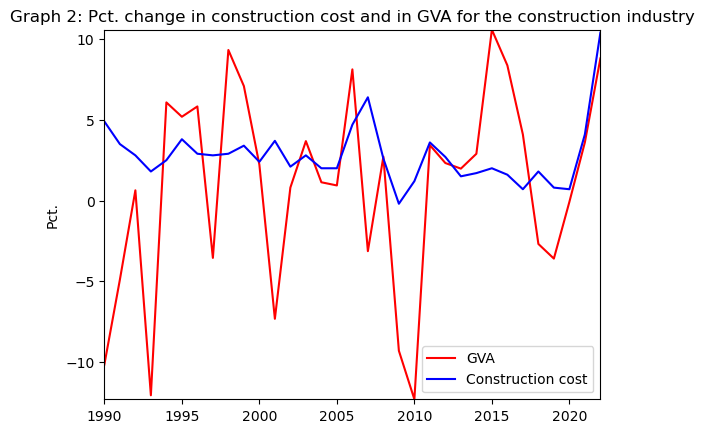

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(merge_cost['TID'],merge_cost['Pct. Change'],color='r',label='GVA')
ax.plot(merge_cost['TID'],merge_cost['Pct. Change in cost'],color='b',label='Construction cost')
ax.margins(0,0)
ax.legend()
plt.ylabel('Pct.')
plt.title('Graph 2: Pct. change in construction cost and in GVA for the construction industry')

Text(0.5, 1.0, 'Graph 3: Pct. change in GVA and employment for the construction industry')

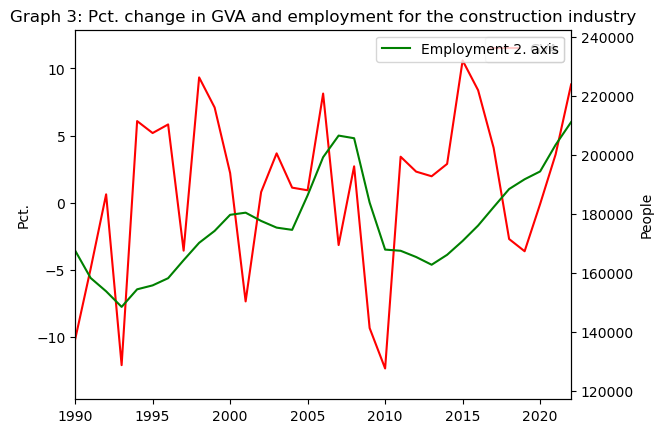

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()
ax1.plot(merge_employ['TID'],merge_employ['Pct. Change'],color='r',label='GVA')
ax2.plot(merge_employ['TID'],merge_employ['Employment'],color='g',label='Employment 2. axis')
ax1.margins(0,0.1)
ax2.margins(0,0.5)
ax1.legend()
ax2.legend()
ax1.set_ylabel('Pct.')
ax2.set_ylabel('People')
plt.title('Graph 3: Pct. change in GVA and employment for the construction industry')

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

From figure 1 we can see that the construction industry is much more volatile than the industry of public administration, education and health. The industry of construction seems to follow the changes in the total GVT more than the industry of public administration, education and health.
We look further into the construction industry, more specifically construction cost and employment, to see if there are any correlations with GVA in the industry.
Graph 2 shows us that the pct. change in construction cost is not as volatility as the pct. change in GVA for the industry. There is not a clear correlation between the construction cost and GVA in whole period, but you could argued that there some correlation in some specific years as 2005 to 2011 and specifically 2020 to 2022.
Graph 3 shows us that employment in the costruction industry has increased from the 1990 to 2022, but with both increasing and decreasing outliers like before the financial crisis and after. There is not a significantly correlation between the employment and GVA in the construction industry, which surprised us a little. We expected that would be some of a correlation between the employment and GVA in construction industry.